# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
#Libraries to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import os
import requests
import tweepy

In [2]:
#read data
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
filename =url.split('/')[-1]

if not os.path.exists(filename):
    response = requests.get(url)
    with open(filename, mode='wb') as file:
        file.write(response.content)
    
#Import the tweet image predictions TSV file into a DataFrame
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# downloding the 

In [5]:
# Read the tweet json file line by line
with open('tweet-json copy', 'r') as file:
    lines = file.readlines()

In [6]:
# Extracting the needed data from the downloaded content
twitter_list = []

# Read the .txt file line by line into a list of dictionaries
for line in open('tweet-json copy', 'r'):
    twitter_data = json.loads(line)
    twitter_list.append({'tweet_id': twitter_data['id_str'],
                        'retweet_count': twitter_data['retweet_count'],
                        'favorite_count': twitter_data['favorite_count'],
                        'followers_count': twitter_data['user']['followers_count']})

In [7]:
# Convert the list of dictionaries to a pandas DataFrame
twitter_data = pd.DataFrame(twitter_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [8]:
 twitter_data.head(5)

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [9]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [10]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [11]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [13]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
twitter_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [15]:
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
Cooper      11
Lola        10
Tucker      10
Penny       10
Bo           9
Winston      9
the          8
Sadie        8
an           7
Toby         7
Bailey       7
Buddy        7
Daisy        7
Leo          6
Milo         6
Dave         6
Jack         6
Stanley      6
Rusty        6
Bella        6
Scout        6
Koda         6
Oscar        6
Jax          6
Louis        5
          ... 
DayZ         1
Divine       1
Obi          1
Al           1
Cal          1
Filup        1
Pawnd        1
Stormy       1
Tater        1
Charl        1
Mosby        1
Ferg         1
Bauer        1
Yoda         1
Samsom       1
Tiger        1
Sobe         1
Flash        1
Brockly      1
Jett         1
Dallas       1
Bertson      1
Lenox        1
Ronnie       1
Jangle       1
Hall         1
Timmy        1
Daniel       1
Mark         1
Bruno        1
Name: name, Length: 957, dtype: int64

In [16]:
 twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

### Quality issues

1. Erroneous datatypes in these columns (tweet_id, rating_denominator,rating_numerator, in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, doggo, floofer, pupper, and puppo)

2. Errors in Dogs name 

3. 181 records do not contain original tweets from WeRateDogs.

4. Drop columns not needed for our analysis

5. Text column includes a text and a short link.

6. Source column in the archieve dataset contains HTML-formatted string,this should be categorical

7. Some tweets have no image. We would remove tweets with no image

8. Some values in rating_numerator and rating_denominator seem to be in error or suspicious outliers.

### Tidiness issues
1. The twitter API table and the image prediction dataset should be merged to twitter_archive dataframe

2. The dog stage is being spread across 4 columns

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [17]:
# Make copies of original pieces of data
archive_clean = twitter_archive.copy()
image_clean = image_prediction.copy()
twitterapi_clean = twitter_data.copy()

In [18]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Issue #1: 
Erroneous datatypes in these columns (tweet_id, rating_denominator,rating_numerator, in_reply_to_status_id, in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, doggo, floofer, pupper, and puppo)

#### Define:  We would fix the erroneous datatypes

#### Code

In [19]:
# Convert tweet_id to str from twitter_archive, image_prediction, twitter_data tables.
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
image_clean.tweet_id = image_clean.tweet_id.astype(str)
twitterapi_clean.tweet_id = archive_clean.tweet_id.astype(str)

# convert timestamp to datetime
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

# convert source to category datatype
archive_clean.source = archive_clean.source.astype("category")

#### Test

In [20]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null category
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: category(1), 

### Issue #2: Error in Dogs name

#### Define 

Spelling or Incorrect names of Dogs

#### Code 

In [21]:
archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [22]:
archive_clean['name'][archive_clean['name'].str.match('[a-z]+')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
names = { 'Jessiga': 'Jessica', 'Sampson': 'Samson', 'Johm': 'John', 'Hemry': 'Henry', 'Fwed': 'Fred' }

archive_clean.name = archive_clean.name.replace(names, value=None)

#### Test

In [24]:
# These names are no longer present
names = ('Jessiga', 'Fwed', 'Sampson', 'Johm', 'Hemry')

archive_clean.query('name in @names')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [25]:
archive_clean.name.value_counts()

None       854
Charlie     12
Lucy        11
Cooper      11
Oliver      11
Lola        10
Penny       10
Tucker      10
Winston      9
Bo           9
Sadie        8
Buddy        7
Samson       7
Toby         7
Bailey       7
Daisy        7
Rusty        6
Koda         6
Leo          6
Jack         6
Stanley      6
Scout        6
Milo         6
Bella        6
Dave         6
Oscar        6
Jax          6
Alfie        5
Larry        5
Chester      5
          ... 
Ralphus      1
Trigger      1
Peanut       1
DayZ         1
Divine       1
Pawnd        1
Jett         1
Diogi        1
Flash        1
Sprout       1
Charl        1
Mosby        1
Ferg         1
Bauer        1
Yoda         1
Samsom       1
Tiger        1
Sobe         1
Tater        1
Mark         1
Brockly      1
Dallas       1
Bertson      1
Lenox        1
Ronnie       1
Jangle       1
Hall         1
Timmy        1
Daniel       1
Bruno        1
Name: name, Length: 930, dtype: int64

### Issue #3: 181 records do not contain original tweets from WeRateDogs

#### Define 

Remove the rows containing the retweets

#### Code

In [26]:
# get the indices of the rows
indices = (archive_clean[~archive_clean.retweeted_status_id.isnull()]).index

archive_clean = archive_clean.drop(index=indices)

#### Test

In [27]:
# check if we still have retweets
archive_clean[~archive_clean.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #4: Drop columns not needed for our analysis

#### Define 
Remove irrelevant colunms

#### Code

In [28]:
# drop columns
cols_to_drop = ['in_reply_to_status_id', 'in_reply_to_user_id', 
                'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp']

archive_clean.drop(cols_to_drop, axis = 1, inplace = True)

#### Test

In [29]:
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Issue #5: Text column includes a text and a short link.

#### Define
Remove hyperlinks in tweets.

#### Code

https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column?noredirect=1

In [30]:
#define function and apply to archive_clean table 
def htmlink(x):
        http_pos = x.find("http")
        # If no link, retain row
        if http_pos == -1:
            x = x
        else:
            # Remove space before link to end
            x = x[:http_pos - 1]
        return x
    
archive_clean.text = archive_clean.text.apply(htmlink)

#### Test

In [31]:
 #confirm changes to show no hyperlink in column again
for row in archive_clean.text[:10]:
    print(row)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10
This is Zoey. She doesn't want to be one of the scary shark

## Issue #6: 
Source column in the archieve dataset contains HTML-formatted string,this should be categorical

#### Define
Source column in the archieve dataset contains HTML-formatted string, that should be categorical. 

I got help using this link https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column?noredirect=1

#### Code

In [32]:
archive_clean.source = archive_clean.source.str.extract('>([\w\W\s]*)<', expand=True)

#### Test

In [33]:
archive_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

## Issue #7:
Remove tweets with no images

#### Code

In [34]:
archive_clean.dropna(axis = 0, inplace=True)

#### Test

In [35]:
 archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 215.0+ KB


## Issue #8: 
Some values in rating_numerator and rating_denominator seem to be in error or suspicious outliers.

#### Code

In [36]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [37]:
# convert to float datatype

rating = archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating.columns = ['rating_numerator', 'rating_denominator']
archive_clean['rating_numerator'] = rating['rating_numerator'].astype(float)
archive_clean['rating_denominator'] = rating['rating_denominator'].astype(float)


#### Test

In [38]:
#confirm changes
with pd.option_context('max_colwidth', 200):
    display(archive_clean[archive_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,11.27,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,11.26,10.0


## Tidiness

#### Issue #1: 

The twitter API table and the image prediction dataset should be merged to twitter_archive dataframe

In [39]:
archive_clean = pd.merge(left=archive_clean, right=twitterapi_clean, how='left', on='tweet_id')
archive_clean = pd.merge(left=archive_clean, right=image_clean, how='left', on='tweet_id')

#### Test

In [40]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 26 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null float64
rating_denominator    2117 non-null float64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
retweet_count         2115 non-null float64
favorite_count        2115 non-null float64
followers_count       2115 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                

## Issue #2: One Variable (Dog Stage) in 4 columns

#### Define 
Combine the dog stage(s) into a single column and replace all 'None' with nan. Then, drop the doggo, floofer, pupper and puppo columns

#### Code

In [41]:
# utility function
def dog_stage(df):
    """
     Determine the appropriate stage(s) of a dog
     Args:
        df (pandas.core.DataFrame) - pandas dataframe containing dog stages in different columns
     Returns:
        nan, a dog stage or a comma seperated list of dog stages
    """
    def no_dog_stage(df):
        return df.doggo == 'None' and df.floofer == 'None' and df.pupper == 'None' and df.puppo == 'None'
    
    def is_none(val):
        return '' if val == 'None' else val
    
    if no_dog_stage(df):
        return np.nan
    else:
        # add the rows together seperated by comma
        dog_stage = '{} {} {} {}'.format(is_none(df.doggo), is_none(df.floofer), is_none(df.pupper), is_none(df.puppo))
        return dog_stage.strip()


# dog wrongly classified as doggo and floofer instead of floofer only
# 854010172552949760 (change doggo to None)
archive_clean.loc[archive_clean.tweet_id == 854010172552949760, 'doggo'] = 'None'

archive_clean['dog_stage'] = archive_clean.apply(dog_stage, axis=1)

archive_clean = archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [42]:
archive_clean[['tweet_id', 'text', 'name', 'dog_stage']].head(10)

,tweet_id,text,name,dog_stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,Phineas,NaN
1,892177421306343426,This is Tilly. She's just checking pup on you....,Tilly,NaN
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,Archie,NaN
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,Darla,NaN
4,891327558926688256,This is Franklin. He would like you to stop ca...,Franklin,NaN
5,891087950875897856,Here we have a majestic great white breaching ...,None,NaN
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,Jax,NaN
7,890729181411237888,When you watch your owner call another dog a g...,None,NaN
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,Zoey,NaN
9,890240255349198849,This is Cassie. She is a college pup. Studying...,Cassie,doggo


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [43]:
# save the twitter archive enhanced dataset
archive_clean.to_csv("twitter_archive_master.csv", index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [44]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

### Visualization

### Q1: Most popular Dog's name

In [45]:
 dogname = twitter_archive_master.name.value_counts()[1:10]

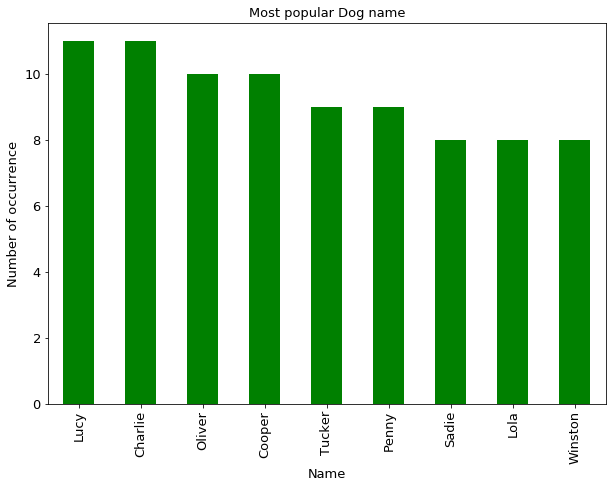

In [46]:
g_bar = dogname.plot.bar(color = 'green', fontsize = 13)

#figure size(width, height)
g_bar.figure.set_size_inches(10, 7);

#Add labels
plt.title('Most popular Dog name', color = 'black', fontsize = '13')
plt.xlabel('Name', color = 'black', fontsize = '13')
plt.ylabel('Number of occurrence', color = 'black', fontsize = '13');
plt.savefig("download0.png")

### Q2: # Most common Twitter Source

In [47]:
source = twitter_archive_master['source'].value_counts()
source

Twitter for iPhone     1985
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

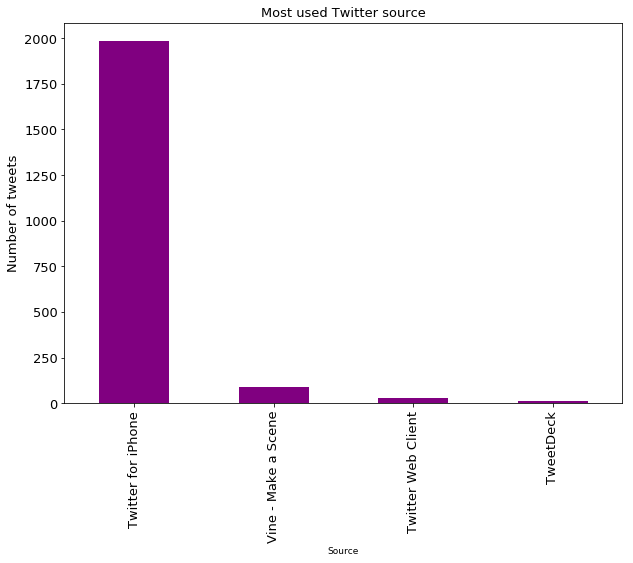

In [48]:
#plot
twitter_source = source.plot.bar(color = 'purple', fontsize = 13)

#figure size(width, height)
twitter_source.figure.set_size_inches(10, 7);

#Add labels
plt.title('Most used Twitter source', color = 'black', fontsize = '13')
plt.xlabel('Source', color = 'black', fontsize = '9')
plt.ylabel('Number of tweets', color = 'black', fontsize = '13');
plt.savefig("download1.png")

### Q3 Type of correlation that exists between Favorite Tweet and Retweet

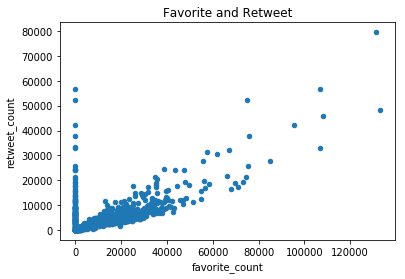

In [49]:
twitter_archive_master.plot(x='favorite_count', y='retweet_count', kind='scatter', title = 'Favorite and Retweet');
plt.savefig("download2.png")

In [50]:
 twitter_archive_master['favorite_count'].corr(twitter_archive_master['retweet_count'])

0.71602798790017852

In [51]:
archive_clean.loc[:, 'rating_numerator': 'favorite_count'].describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,2117.000000,2117.000000,2115.000000,2115.000000
mean,12.204903,10.501181,3019.028842,7659.743262
std,40.249526,7.105845,5285.092226,11823.377058
min,0.000000,2.000000,2.000000,0.000000
25%,10.000000,10.000000,601.500000,1381.000000
50%,11.000000,10.000000,1335.000000,3385.000000
75%,12.000000,10.000000,3433.000000,8833.000000
max,1776.000000,170.000000,79515.000000,132810.000000


### Insights:
1. The Most popular Dog's name is Charlie

2. The Most common twitter source is Twitter for iPhone

3. There is a positive correlation between the retweet_count and the favorite_count

4. The highest number of retweet was 79,515 while the count of the most favorite tweet was 132,810